<a href="https://colab.research.google.com/github/kanghye98/virtual-piano/blob/master/%5B%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5%5D201738401_%EA%B0%95%ED%98%9C%EC%9B%90_titanic_%EC%83%9D%EC%A1%B4%EC%9C%A8_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic 생존율 예측하기

1. 데이터 불러오기 <br>
pandas를 이용하여 csv파일을 불러옴

In [1]:
import pandas as pd

train = pd.read_csv('/content/drive/My Drive/Titanic/train.csv')
test = pd. read_csv('/content/drive/My Drive/Titanic/test.csv')

불러온 데이터를 확인

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test.shape

(418, 11)

2. 데이터 분석하기 <br>


*   Survived : 생존여부
*   Pclass : 티켓 클래스
*   Age : 나이
*   SibSp : 함께 탑승한 자녀/ 배우자 수
*   Parch : 함께 탑승한 부모님/ 아이들의 수
*   Sex : 성별
*   Ticket : 티켓 번호
*   Fare : 탑승 요금
*   Cabin : 수하물 번호
*   Embarked : 선착장





In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


데이터들을 이용하여 pie chart를 그려 분포를 살펴 보았음

In [7]:
def pie_chart(feature):
  feature_ratio = train[feature].value_counts(sort=False)
  feature_size = feature_ratio.size
  feature_index = feature_ratio.index
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()

  plt.plot(aspect='auto')
  plt.pie(feature_ratio, labels =feature_index,autopct = '%1.1f%%')
  plt.title(feature + '\'s ratio in total')
  plt.show()

  for i, index in enumerate(feature_index):
    plt.subplot(1,feature_size+1,i+1,aspect='equal')
    plt.pie([survived[index],dead[index]],labels=['Survived','Dead'],autopct='%1.1f%%')
    plt.title(str(index) + '\'s ratio')


plt.show()

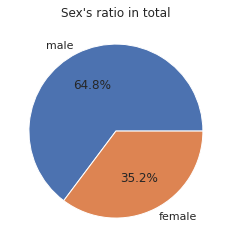

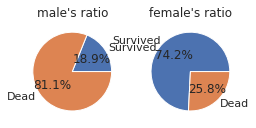

In [8]:
pie_chart('Sex')

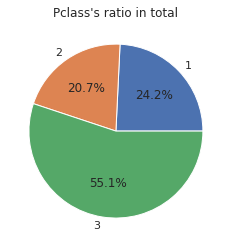

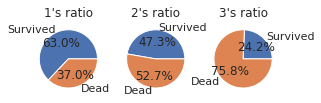

In [9]:
pie_chart('Pclass')

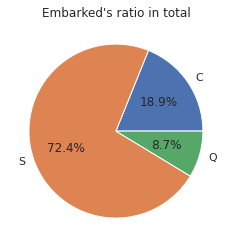

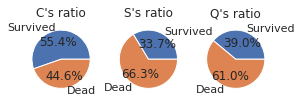

In [10]:
pie_chart('Embarked')

In [11]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

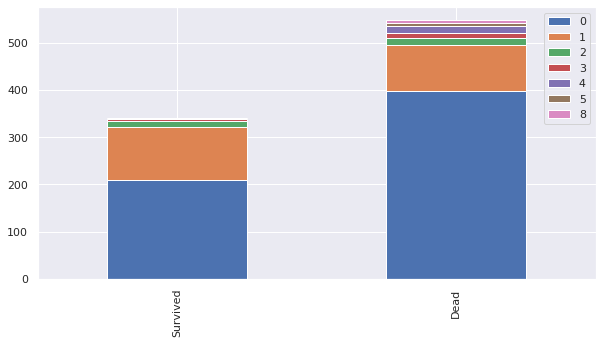

In [12]:
bar_chart("SibSp")

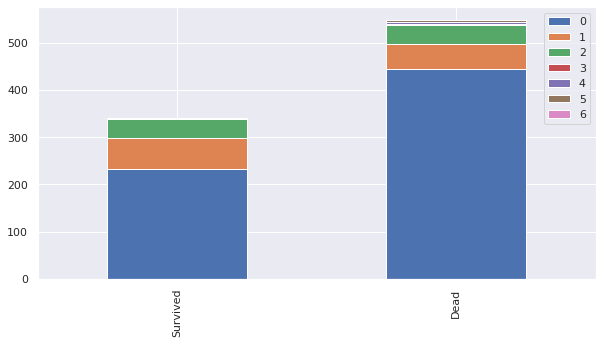

In [13]:
bar_chart("Parch")

In [14]:
train_and_test = [train, test]

In [15]:
for dataset in train_and_test:
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.')

train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [16]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
for dataset in train_and_test:
  dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer','Lady','Major', 'Rev', 'Sir'], 'Other')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [18]:
for dataset in train_and_test:
  dataset['Title'] = dataset['Title'].astype(str)

In [19]:
for dataset in train_and_test:
  dataset['Sex'] = dataset['Sex'].astype(str)

In [20]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [21]:
for dataset in train_and_test:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')
  dataset['Embarked'] = dataset['Embarked'].astype(str)

In [22]:
for dataset in train_and_test:
  dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
  dataset['Age'] = dataset['Age'].astype(int)
  train['AgeBand'] = pd.cut(train['Age'], 5)

print (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [23]:
for dataset in train_and_test:
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
  dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str)

In [24]:
for dataset in train_and_test:
  dataset['Fare'] = dataset['Fare'].fillna(13.675)

In [25]:
for dataset in train_and_test:
  dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
  dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
  dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
  dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
  dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
  dataset['Fare'] = dataset['Fare'].astype(int)

In [26]:
for dataset in train_and_test:
  dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
  dataset['Family'] = dataset['Family'].astype(int)

In [27]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,Young,1,0,A/5 21171,0,NaN,S,Mr,"(16.0, 32.0]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Middle,1,0,PC 17599,4,C85,C,Mrs,"(32.0, 48.0]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,Young,0,0,STON/O2. 3101282,1,NaN,S,Miss,"(16.0, 32.0]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Middle,1,0,113803,4,C123,S,Mrs,"(32.0, 48.0]",1
4,5,0,3,"Allen, Mr. William Henry",male,Middle,0,0,373450,1,NaN,S,Mr,"(32.0, 48.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,Young,0,0,211536,2,NaN,S,Other,"(16.0, 32.0]",0
887,888,1,1,"Graham, Miss. Margaret Edith",female,Young,0,0,112053,3,B42,S,Miss,"(16.0, 32.0]",0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Young,1,2,W./C. 6607,3,NaN,S,Miss,"(16.0, 32.0]",3
889,890,1,1,"Behr, Mr. Karl Howell",male,Young,0,0,111369,3,C148,C,Mr,"(16.0, 32.0]",0


In [28]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)

In [29]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,892,3,"Kelly, Mr. James",male,Middle,0,0,330911,0,NaN,Q,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,Middle,1,0,363272,0,NaN,S,Mrs,1
2,894,2,"Myles, Mr. Thomas Francis",male,Prime,0,0,240276,1,NaN,Q,Mr,0
3,895,3,"Wirz, Mr. Albert",male,Young,0,0,315154,1,NaN,S,Mr,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,Young,1,1,3101298,2,NaN,S,Mrs,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,Young,0,0,A.5. 3236,1,NaN,S,Mr,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,Middle,0,0,PC 17758,4,C105,C,Other,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,Middle,0,0,SOTON/O.Q. 3101262,0,NaN,S,Mr,0
416,1308,3,"Ware, Mr. Frederick",male,Young,0,0,359309,1,NaN,S,Mr,0


In [30]:
test = test.drop(features_drop, axis=1)

In [31]:
train = train.drop(['PassengerId', 'AgeBand', 'Fare'], axis=1)

In [32]:
print(train.head())
print(test.head())

   Survived  Pclass     Sex     Age Embarked Title  Family
0         0       3    male   Young        S    Mr       1
1         1       1  female  Middle        C   Mrs       1
2         1       3  female   Young        S  Miss       0
3         1       1  female  Middle        S   Mrs       1
4         0       3    male  Middle        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     0        Q    Mr       0
1          893       3  female  Middle     0        S   Mrs       1
2          894       2    male   Prime     1        Q    Mr       0
3          895       3    male   Young     1        S    Mr       0
4          896       3  female   Young     2        S   Mrs       2


male은 0, female은 1로 mapping해 주었음

In [33]:
sex_mapping = {"male":0,"female":1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

Child는 0, Young은 1, Middle은 2, Prime은 3, Old는 4로 mapping 해주었음

In [34]:
age_mapping = {"Child":0,"Young":1,"Middle":2,"Prime":3,"Old":4}
train['Age'] = train['Age'].map(age_mapping)
test['Age'] = test['Age'].map(age_mapping)

Cherbourg를 나타내는 C는 0, Queenstown을 나타내는 Q는 1, Southampton은 2로 mapping 해주었음

In [37]:
emb_mapping = {"C":0,"Q":1,"S":2}
train['Embarked'] = train['Embarked'].map(emb_mapping)
test['Embarked'] = test['Embarked'].map(emb_mapping)

**모델 설계 및 학습** <br>
1.LogisticRegression<br>
2.SVM<br>
3.KNN<br>
4.RandomForest<br>
5.NaiveBayes<br>

위의 다섯 가지 모델을 이용하여 예측을 진행하였음

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle

In [71]:
train_label=train['Survived']
train_data=train.drop(['Survived','Title'], axis=1)
test_data = test.drop(["PassengerId","Title","Fare"],axis=1).copy()

In [72]:
train_data, train_label = shuffle(train_data, train_label, random_state = 5)

In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 126 to 867
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    891 non-null    int64
 1   Sex       891 non-null    int64
 2   Age       891 non-null    int64
 3   Embarked  891 non-null    int64
 4   Family    891 non-null    int64
dtypes: int64(5)
memory usage: 41.8 KB


In [74]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int64
 1   Sex       418 non-null    int64
 2   Age       418 non-null    int64
 3   Embarked  418 non-null    int64
 4   Family    418 non-null    int64
dtypes: int64(5)
memory usage: 16.5 KB


In [75]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())

Accuracy :  79.35 %


In [76]:
# SVM
svm_pred = train_and_test(SVC())

Accuracy :  82.27 %


In [77]:
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))

Accuracy :  83.05 %


In [78]:
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))

Accuracy :  85.07 %


In [79]:
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  79.8 %
